In [21]:
import requests
import pandas as pd

bearer_token = "AAAAAAAAAAAAAAAAAAAAAH0u3AEAAAAAOyG0NVJ%2Fmi%2B71agweUST2yiP9m0%3DMVPgm9wpllegpjFEFrAmZyss3LW0PKAVeiG9TniK4eM6kwNqyf"

headers = {
    "Authorization": f"Bearer {bearer_token}"
}

query = input("Enter a topic: ")

search_url = "https://api.twitter.com/2/tweets/search/recent"

params = {
    "query": f"{query} lang:en -is:retweet",
    "max_results": 50,
    "tweet.fields": "created_at,text,author_id"
}

response = requests.get(search_url, headers=headers, params=params)

print("Status Code:", response.status_code)

tweets = response.json()
data = []

if "data" in tweets:
    for tweet in tweets["data"]:
        data.append({
            "Date": tweet["created_at"],
            "User ID": tweet["author_id"],
            "Tweet": tweet["text"]
        })
    df = pd.DataFrame(data)
    print("\n✅ Tweets Fetched Successfully:\n")
    print(df.head())
else:
    print("❌ No tweets found or an error occurred.")
    print(tweets)


Enter a topic:  Jio 5G


Status Code: 200

✅ Tweets Fetched Successfully:

                       Date              User ID  \
0  2025-07-15T15:13:52.000Z  1872704226440429570   
1  2025-07-15T14:36:48.000Z           2888219984   
2  2025-07-15T14:28:56.000Z           1373901961   
3  2025-07-15T14:28:56.000Z           1373901961   
4  2025-07-15T14:28:55.000Z           1373901961   

                                               Tweet  
0  Handset - 5G ✅\nJio Plan - True 5G Unlimited ✅...  
1  @JioCare @reliancejio @Airtel_Presence @airtel...  
2  @KenilJasoliya1 covered under 5G, you can visi...  
3  @KenilJasoliya1 Interest for Jio True 5G in My...  
4  @KenilJasoliya1 Hi Kenil, we are here to help ...  


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

df["Sentiment Score"] = df["Tweet"].apply(lambda text: analyzer.polarity_scores(text)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Sentiment Score"].apply(classify_sentiment)

print(df[["Tweet", "Sentiment Score", "Sentiment"]].head())



                                               Tweet  Sentiment Score  \
0  Handset - 5G ✅\nJio Plan - True 5G Unlimited ✅...           0.2263   
1  @JioCare @reliancejio @Airtel_Presence @airtel...           0.0000   
2  @KenilJasoliya1 covered under 5G, you can visi...           0.0000   
3  @KenilJasoliya1 Interest for Jio True 5G in My...           0.8979   
4  @KenilJasoliya1 Hi Kenil, we are here to help ...           0.7184   

  Sentiment  
0  Positive  
1   Neutral  
2   Neutral  
3  Positive  
4  Positive  


In [23]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


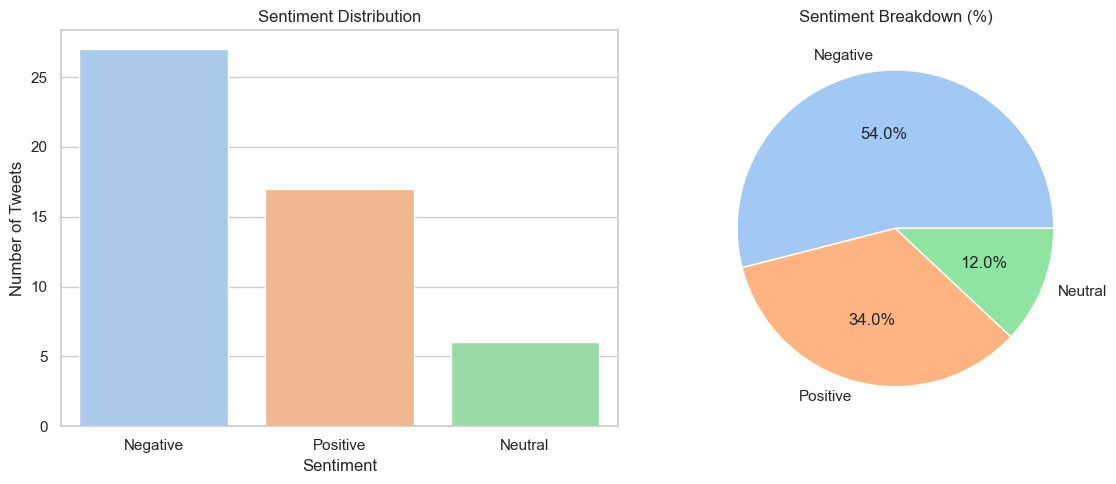

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, hue='Sentiment',
            palette='pastel', legend=False, ax=axes[0])
axes[0].set_title('Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Number of Tweets')

axes[1].pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'],
            autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1].set_title('Sentiment Breakdown (%)')

plt.tight_layout()
plt.show()


In [26]:
df["Tweet Length"] = df["Tweet"].apply(len)


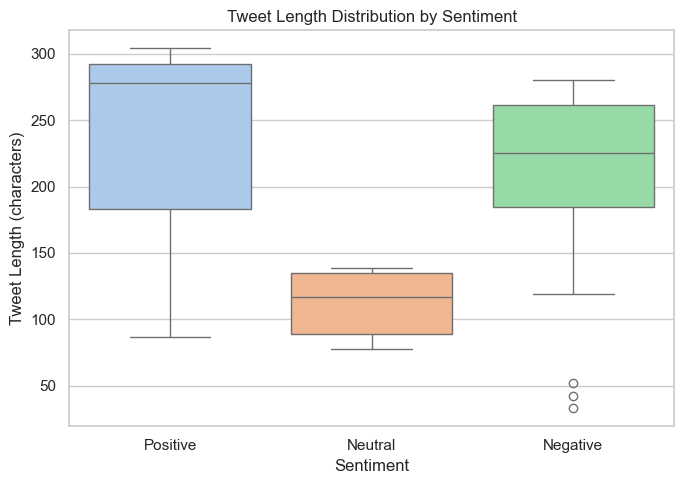

In [27]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Sentiment', y='Tweet Length', data=df, hue='Sentiment', palette='pastel', legend=False)
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.tight_layout()
plt.show()
